In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta

In [2]:
btc_raw_df = pd.read_parquet("/home/giujorge/Documents/Projets/bot_strategies/data/raw/BTC-USDT.csv.parquet.gzip")
btc_raw_df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.77518300,1502942459999,7564.90685084,3,0.07518300,320.39085084,7960.54017996
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.00000000,1502942519999,0.00000000,0,0.00000000,0.00000000,7960.45262989
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.26107400,1502942579999,1117.54292144,2,0.26107400,1117.54292144,7960.37529526
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.01200800,1502942639999,51.17185184,3,0.01200800,51.17185184,7960.37529526
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.14079600,1502942699999,599.99933808,1,0.14079600,599.99933808,7960.37529526
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18 14:09:00,39423.05,39423.06,39377.05,39385.62,22.37338000,1650290999999,881512.83100580,758,6.59638000,259885.09290650,0
2022-04-18 14:10:00,39385.61,39401.54,39370.24,39400.00,29.43069000,1650291059999,1159033.25545720,788,14.55146000,573044.31840130,0
2022-04-18 14:11:00,39400.00,39444.80,39399.83,39442.55,25.65637000,1650291119999,1011437.53518520,720,13.72377000,541044.94403500,0


In [12]:
btc_raw_df['%K'] = ta.momentum.stoch(btc_raw_df.high, btc_raw_df.low, btc_raw_df.close, window=14, smooth_window=3)

In [13]:
btc_raw_df['%D'] = btc_raw_df['%K'] .rolling(3).mean()

In [14]:
btc_raw_df['rsi'] = ta.momentum.rsi(btc_raw_df.close, window=14)

In [15]:
btc_raw_df['macd'] = ta.trend.macd_diff(btc_raw_df.close)

In [16]:
btc_raw_df.dropna(inplace=True)

In [19]:
def gettrigers(df, lags, buy= True):
    dfx = pd.DataFrame()
    for i in range(1,lags + 1):
        if buy :
            mask = (btc_raw_df['%K'].shift(i) < 20 ) & (btc_raw_df['%D'].shift(i) < 20)
        else :
            mask = (btc_raw_df['%K'].shift(i) > 80 ) & (btc_raw_df['%D'].shift(i) > 80)
        dfx = dfx.append(mask, ignore_index=True)
    return dfx.sum(axis=0)

In [25]:
btc_raw_df['buytrigger'] = np.where(gettrigers(btc_raw_df,4,),1,0)

/tmp/ipykernel_160580/2943311291.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)
/tmp/ipykernel_160580/2943311291.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)
/tmp/ipykernel_160580/2943311291.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)
/tmp/ipykernel_160580/2943311291.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)


In [26]:
btc_raw_df['selltrigger'] = np.where(gettrigers(btc_raw_df,4,False),1,0)

/tmp/ipykernel_160580/2943311291.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)
/tmp/ipykernel_160580/2943311291.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)
/tmp/ipykernel_160580/2943311291.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)
/tmp/ipykernel_160580/2943311291.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)


In [27]:
btc_raw_df['buy'] = np.where((btc_raw_df.buytrigger) &
                             (btc_raw_df['%K'].between(20,80)) &
                             (btc_raw_df['%D'].between(20,80)) & 
                             (btc_raw_df.rsi > 50) &
                             (btc_raw_df.macd > 0),1,0)

In [28]:
btc_raw_df['sell'] = np.where((btc_raw_df.selltrigger) &
                             (btc_raw_df['%K'].between(20,80)) &
                             (btc_raw_df['%D'].between(20,80)) & 
                             (btc_raw_df.rsi < 50) &
                             (btc_raw_df.macd < 0),1,0)

In [29]:
buying_dates, selling_dates = [], []

In [33]:
for i in range(len(btc_raw_df) -1 ):
    if btc_raw_df.buy.iloc[i]:
        buying_dates.append(btc_raw_df.iloc[i + 1].name)
        for num, j in enumerate(btc_raw_df.sell[i:]):
            if j:
                selling_dates.append(btc_raw_df.iloc[i + num + 1].name)
                break

In [36]:
cutit = len(buying_dates) - len(selling_dates)

In [37]:
if cutit:
    buying_dates = buying_dates[:-cutit]

In [48]:
frame = pd.DataFrame({'buying_dates': buying_dates, 'selling_dates': selling_dates})

In [49]:
actuals = frame[frame.buying_dates > frame.selling_dates.shift(1)]

In [51]:
actuals

,buying_dates,selling_dates
1,2017-08-18 16:07:00,2017-08-18 16:50:00
2,2017-08-18 20:40:00,2017-08-18 23:44:00
4,2017-08-19 03:07:00,2017-08-19 03:35:00
5,2017-08-19 11:14:00,2017-08-19 14:04:00
6,2017-08-20 14:17:00,2017-08-20 16:23:00
...,...,...
15609,2022-04-17 02:15:00,2022-04-17 14:46:00
15621,2022-04-17 15:19:00,2022-04-17 16:18:00
15622,2022-04-17 19:17:00,2022-04-18 01:48:00
15626,2022-04-18 06:06:00,2022-04-18 07:22:00


In [52]:
def profitcalc():
    buyprices = btc_raw_df.loc[actuals.buying_dates].open
    sellprices = btc_raw_df.loc[actuals.selling_dates].open
    return(sellprices.values - buyprices.values) / buyprices.values

In [53]:
profits = profitcalc()

In [55]:
profits.mean()

0.0005802699621110416

In [56]:
(profits + 1).prod()

12.749445333412393

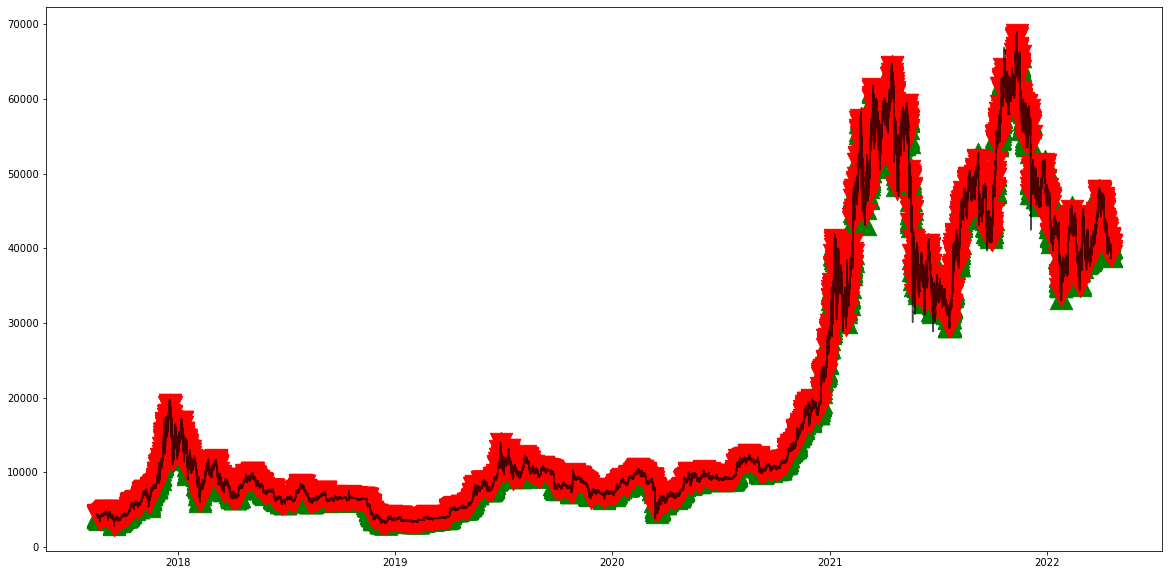

In [59]:
plt.figure(figsize=(20,10))
plt.plot(btc_raw_df.close, color='k', alpha=0.7)
plt.scatter(actuals.buying_dates, btc_raw_df.open[actuals.buying_dates], marker='^', color='g', s=500)
plt.scatter(actuals.selling_dates, btc_raw_df.open[actuals.selling_dates], marker='v', color='r', s=500)